In [1]:
import time
from  nltk.tokenize import sent_tokenize,word_tokenize
from nltk.corpus import stopwords
from nltk.tokenize import RegexpTokenizer
from sklearn.metrics.pairwise import cosine_similarity
import matplotlib.pyplot as plt

In [2]:
import nltk
from nltk.corpus import stopwords
stop_words=set(stopwords.words('english'))
import codecs
import collections 
import seaborn

In [3]:
def prediction_knn(label,n):
    count=[0]*n
    predict_proba=[]
    for i in range(len(label)):
        count[label[i]]+=1
    predict=np.argmax(count)
    for i in range(n):
        predict_proba.append(count[i]/len(label))
    return predict,predict_proba

In [4]:
def roc_design(prob_dist,testdata,checker):
    aux1=[]
    aux2=[]
    testdata1=copy.deepcopy(testdata)
    for i in range(len(testdata)):
        
        aux1.append(prob_dist[i])
        aux2.append(testdata[i])
    main1=sort_list(aux2, aux1)
#     print("Probability in incresing order : ",main1)
    
    tpr=[]
    fpr=[]
    #aux1 has prob_distribution and main1 has testlabel in sorted order
   
    main2=[]
    j=0
    for j in range(len(prob_dist)):
        main2.append(checker)
    i=0
    #Logic 
    if (checker+1)==4:
        flag=checker-1
    else:
        flag=checker+1
        
    while i <len(prob_dist):
        tpr1=0
        fpr1=0
        j=0
        
        while (j  <= i):
            main2[j]=flag
            j=j+1
#         j=i
#         while j <len(prob_dist):
#             main1[j]=2
#             j=j+1
#         print(main1)
#         m=[]
#         tpr.append(tpr1)
#         fpr.append(fpr1)
        tpr1,fpr1=find_tpr_fpr(copy.deepcopy(main2),copy.deepcopy(main1),checker)
#         e.append(testdata)
#         d.append(main1)
        fpr.append(fpr1)
        tpr.append(tpr1)
        
        i=i+1
    return tpr,fpr


In [5]:
def cosine_sim(X,Y):
    return np.dot(X,Y)/float(np.linalg.norm(X)*np.linalg.norm(Y))

In [6]:
#geeks for geeks 
def sort_list(list1, list2): 
  
    zipped_pairs = zip(list2, list1) 
  
    z = [x for _, x in sorted(zipped_pairs)] 
      
    return z 

In [7]:
def find_tpr_fpr(predict,real,checker):
    tp=0
    tn=0
    fp=0
#     print("find_tpr_fpr")
    fn=0
    voc=copy.deepcopy([0,1,2,3,4])
    v=voc.index(checker)
    del voc[v]
    for i in range(len(predict)):
        if predict[i]==checker and real[i]==checker:
            tp=tp+1
        if (predict[i] in voc ) and real[i]==checker:
            fn=fn+1
        if predict[i]==checker and (real[i] in voc):
            fp=fp+1
        if (predict[i] in voc) and (real[i] in voc):
            tn=tn+1
    tpr2=0
    fpr2=0
#     print("Total :",(tp+fp+tn+fn))
    tpr2=float(tp/float(tp+fn+1))   
    fpr2=float(fp/float(fp+tn+1))
    
    return tpr2,fpr2

In [8]:
import os
import copy
import numpy as np
from nltk.stem.wordnet import WordNetLemmatizer
import random

In [9]:
def size(dict_list):
    sum=0
    for i in dict_list.keys():
        sum+=dict_list[i]
    return sum

In [10]:
def accuracy(predict,true):
    count=0
    for i in range(len(predict)):
        if predict[i]==true[i]:
            count+=1
    return count/float(len(predict))

In [11]:
#geeks for geeks 
def sort_list(list1, list2): 
    zipped_pairs = zip(list2, list1) 
    z = [x for _, x in sorted(zipped_pairs)] 
    return z 

In [12]:
def find_number(str1):
    s=[]
    s1=''
    for i in range(len(str1)):
        s.append(str1[i])
#     print(s)
#     print(s)
    name=[]
    name1=''
    for i in range(len(s)):
        if s[i]>='0' and s[i]<='9':
            name=s[i:]
            break
    for i in range(len(name)):
        name1=name1+name[i]
    return str(name1)

In [13]:
def punc_improve(str1):
    s=[]
    s1=''
    for i in range(len(str1)):
        s.append(str1[i])
#     print(s)

    for i in range(len(s)):
        if (s[i]=='.' or s[i]==',' or  s[i]=='!'or  s[i]=='*' or s[i]=='+'  or s[i]=='-' or s[i]=='\"'  or s[i]=='\'' or
            s[i]=='{' or s[i]=='}' or s[i]==';' or s[i]==':' or s[i]=='(' or s[i]==')' or
        s[i]=='='  or s[i]=='@' or s[i]=='>' or s[i]=='[' or s[i]==']' or s[i]=='|' 
        or s[i]=='#' or s[i]=='%' or s[i]=='`' or s[i]=='~' or s[i]=="/" or s[i]=='_' or s[i]=='<' or s[i]=='?' or  s[i]==' ' or s[i]=='$' or s[i]=='^'or s[i]=='' or s[i]==' ' or s[i]=='&'):
            pass
        else:
            s1=s1+s[i]
        
    return s1


In [14]:
def dash_improve(str1):
    s=[]
    s1=''
    for i in range(len(str1)):
        s.append(str1[i])
#     print(s)

    for i in range(len(s)):
        if s[i]!='-':
            s1=s1+s[i]
    return s1

In [15]:
def digit_improve(str1):
    s=[]
    s1=''
    for i in range(len(str1)):
        s.append(str1[i])
#     print(s)
    for i in range(len(s)):
        if s[i]=='0':
            s1=s1+'zero'
        if s[i]=='1':
            s1=s1+'one'
        if s[i]=='2':
            s1=s1+'two'
        if s[i]=='3':
            s1=s1+'three'
        if s[i]=='4':
            s1=s1+'four'
        if s[i]=='5':
            s1=s1+'five'
        if s[i]=='6':
            s1=s1+'six'
        if s[i]=='7':
            s1=s1+'seven'
        if s[i]=='8':
            s1=s1+'eight'
        if s[i]=='9':
            s1=s1+'nine'
        if s[i]>='0' and s[i]<='9':
            pass
        else:
            s1=s1+s[i]
    return s1


In [16]:
# temp={}
# for j in train:

#     temp[j]=class_wise[i][j]
# class_wise1.append(temp)

In [17]:
def random_split(class_wise,train_size,test_size):
    train_size=int(train_size*len(class_wise[0])/float(100))
    test_size=len(class_wise[0].keys())-train_size
    train_set={}
    test_set={}
    class_wise1=[]
    class_wise2=[]
    for i in range(len(class_wise)):
        keys=class_wise[i].keys()
        shuffled_data=random.sample(keys, len(keys))
        train=shuffled_data[:train_size]
        test=shuffled_data[train_size:]
        train_data=[]
        test_data=[]
        temp={}
        for j in train:
            temp[j]=class_wise[i][j]
            train_data.append(class_wise[i][j])
        class_wise1.append(temp)
        temp={}
        for j in test:
            temp[j]=class_wise[i][j]
            test_data.append(class_wise[i][j])
        class_wise2.append(temp)
        # sum the values with same keys 
    counter = collections.Counter() 
    for d in train_data:  
        counter.update(d) 

    train_set = dict(counter) 
    counter = collections.Counter() 
    for d in test_data:  
        counter.update(d) 

    test_set = dict(counter)
#     print(len(test_set))
    return class_wise1,class_wise2,train_set,test_set
     
    

In [18]:
#Here we wil get the sub-folders
os.chdir('C:\\Users\\Dell-pc\\Desktop\\IR_4\\20_newsgroups')
directories=os.listdir()

In [19]:
eliminate=['comp.graphics', 'sci.med', 'talk.politics.misc', 'rec.sport.hockey','sci.space']

In [20]:
start1=time.time()

In [21]:
files=[]
union_set=[]
postings={}
corpus={}
corpus1={}
vocub={}
vocub_main=[]
term_frequency={}
counter=0
for i in range(len(directories)):
    files.append(copy.deepcopy([]))
class_wise=[]
for i in range(len(directories)):
    corpus_small={}
    if directories[i] in eliminate:
        print(counter)
        counter=counter+1
        
        address=os.getcwd()+"\\"+str(directories[i])
        os.chdir(address)
        files_in_dir=os.listdir()
        for j in range(len(files_in_dir)):

            files[i].append(directories[i]+"/"+files_in_dir[j])
            address1=address+"\\"+files_in_dir[j]
            c=[]
            union_set=union_set+[files[i][j]]
            offset=0
            #stackoverflow
            f=codecs.open(address1,'r',encoding='utf_8',errors="ignore")

            c = f.readlines()

            final=[]
#             in1=c.index('\n')
            for k in range(0,len(c)):

                final.append(c[k])
            #Final is a list of sentences 
            tokenizer = RegexpTokenizer(r'\w+')
            #Tokenizer previously used
    #         tokenizer=RegexpTokenizer('\s+',gaps=True)
            lemmatizer = WordNetLemmatizer()

            temp1=[]
            vocub={}
            for k in range(len(final)):
                temp=[]
                temp=tokenizer.tokenize(final[k])
                temp=[lemmatizer.lemmatize(w,pos='v') for w in temp]
                temp =[w.lower() for w in temp]
                
             
    #             print("Stop Wro",temp)

                for n in range(len(temp)):
#                     if hasNumbers(temp[n]):
#                         continue
#                     if temp[n].isdigit():
#                         continue
                    temp2=copy.deepcopy(temp[n])
                    t1=str(dash_improve(str(temp2)))

                    temp2=t1
                    t2=str(digit_improve(str(temp2)))

                    temp2=t2
                    t3=str(punc_improve(str(temp2)))

                    temp2=t3

                    if temp2==list(['']) or temp2==list([' ']) or temp2=='' or temp2==' ':
                        pass
                    else:
                        temp4=[]
                        temp4.append(temp2)
                        temp1=temp1+temp4
                    if temp2 in vocub.keys():
                        vocub[temp2]=vocub[temp2]+1
                    else:
                        vocub[temp2]=1

            corpus1[files[i][j]]=temp1
            corpus[files[i][j]]=vocub
            corpus_small[files[i][j]]=vocub
            vocub_main=set(vocub_main).union(set(temp1))
    #         if (counter % 5000)==0:
    #             print("Count ",counter)
    #         counter=counter+1
            for k in set(corpus[files[i][j]]):

                if k in postings.keys():
                    if files[i][j] in postings[k]:
                        pass
                    else:

                        postings[k].append(files[i][j])
                    term_frequency[k]=term_frequency[k]+1
                else:
                    s=[]
                    s.append(files[i][j])
                    postings[k]=s
                    term_frequency[k]=1  
        class_wise.append(corpus_small)
        os.chdir('..') 

0
1
2
3
4


In [22]:
start2=time.time()
print(start2-start1)

318.30195140838623


In [23]:
len(vocub_main)

The history saving thread hit an unexpected error (OperationalError('database is locked')).History will not be written to the database.


64792

# Q1

In [24]:
#Give the value in percentage or ratio 
train_size=90
test_size=10


In [25]:
start3=time.time()

In [26]:
train_data,test_data,train_set,test_set=random_split(class_wise,train_size,test_size)

In [27]:
vocub2={}
for i in range(len(train_data)):
    for j in train_data[i]:
        for k in train_data[i][j]:
            vocub2[k]=0
print("Training data vocub ",len(vocub2))
vocub2={}
for i in range(len(test_data)):
    for j in test_data[i]:
        for k in test_data[i][j]:
            vocub2[k]=0
print("Testing data vocub ",len(vocub2))


Training data vocub  61807
Testing data vocub  17224


In [28]:
start4=time.time()
print(start4-start3)

0.45174098014831543


In [29]:
len(train_data)

5

In [30]:
len(test_data)

5

In [31]:
#Prior Calculations
prior=[]
sum=0
for i in range(len(class_wise)):
    sum+=len(class_wise[i])
for i in range(len(class_wise)):
    prior.append(len(class_wise[i])/float(sum))

    

In [32]:
vocub_main=list(vocub_main)
vocub_size=len(vocub_main)

In [33]:
start5=time.time()

# Training the Data

In [97]:
#Conditional Probability for terms given class
cond_prob={}
for i in range(len(class_wise)):
    v=0
    for k in train_data[i].keys():
        
        for j in vocub_main:
            if j in train_data[i][k]:
                v+=train_data[i][k][j]
    temp={}
    for k in vocub_main:
        sum=0
        for j in train_data[i].keys():
            if k in train_data[i][j]:
                sum+=train_data[i][j][k]
        temp[k]=(sum+1)/float(v+vocub_size)
    cond_prob[i]=temp
    
        

KeyboardInterrupt: 

In [ ]:
start6=time.time()
print(start6-start5)

# Testing the test set 

In [ ]:
# For testing the test set
test_label=[]
for i in range(len(test_data)):
    for j in range(len(test_data[i])):
        test_label.append(i)
        

In [ ]:
label_pred=[]
for i in range(len(test_data)):
    
    for j in test_data[i]:
        store=[]
        for m in range(len(class_wise)):
            sum=np.log(prior[m])
            for k in test_data[i][j]:
                try:
                    sum+=test_data[i][j][k]*np.log(cond_prob[m][k])
                except:
                    sum+=0
            store.append(sum)
        label_pred.append(np.argmax(store))
    
            

In [ ]:
print("Test Accuracy : ",accuracy(label_pred,test_label))

In [ ]:
start7=time.time()
print(start7-start6)

In [ ]:
#Confusion Matrix
confusionmatrix=[]

temp=[0,0,0,0,0]
for i in range(len(class_wise)):
    confusionmatrix.append(temp)
    temp=copy.deepcopy(temp)
for i in range(len(test_label)):
    confusionmatrix[test_label[i]][label_pred[i]]=confusionmatrix[test_label[i]][label_pred[i]]+1
seaborn.heatmap(confusionmatrix,annot=True,fmt="d")   

# Q2

In [34]:
train_doc=0
for i in range(len(train_data)):
    train_doc+=len(train_data[i].keys())


In [35]:
start8=time.time()

In [36]:
#Created IDF Vectors
idf_vector={}
idf=[]
tf_idf_main={}
counter=0
for j in vocub_main:

    count=0
    for k in range(len(train_data)):
        for i in train_data[k]:
           
            if counter%20000000==0:
                print("Counter : ",counter)
            counter+=1
            if j in train_data[k][i]:
                count+=1
        
    idf_vector[j]=np.log(train_doc/(1+count))

Counter :  0
Counter :  20000000
Counter :  40000000
Counter :  60000000
Counter :  80000000
Counter :  100000000
Counter :  120000000
Counter :  140000000
Counter :  160000000
Counter :  180000000
Counter :  200000000
Counter :  220000000
Counter :  240000000
Counter :  260000000
Counter :  280000000


In [37]:

# tdf_idf_main={}
# counter=0
# for i in corpus.keys():
#     count=0
#     f={}
#     for j in vocub_main:
#         if counter%1000000==0:
#             print("Counter : ",counter)
#         counter+=1
#         f[j]=0
#     tdf_idf_main[i]=f

In [38]:
#To make the dictionary for tf
train_data1=copy.deepcopy(train_data)

for i in range(len(train_data1)):
    for j in train_data[i].keys():
        s=size(train_data[i][j])
        for k in train_data[i][j]:
            train_data1[i][j][k]=train_data[i][j][k]/float(s)
        

In [39]:
# To tf- vectors

tf_idf_main={}
counter=0
tf={}
for k in range(len(train_data1)):
    for i in train_data1[k]:
        for j in vocub_main:
            if counter%20000000==0:
                print("Counter : ",counter)
            counter+=1
            
            if j in train_data1[k][i]:
                if j not in tf.keys():
                    tf[j]=train_data1[k][i][j]
                else:
                    if train_data1[k][i][j]>tf[j]:
                        tf[j]=train_data1[k][i][j]



Counter :  0
Counter :  20000000
Counter :  40000000
Counter :  60000000
Counter :  80000000
Counter :  100000000
Counter :  120000000
Counter :  140000000
Counter :  160000000
Counter :  180000000
Counter :  200000000
Counter :  220000000
Counter :  240000000
Counter :  260000000
Counter :  280000000


In [40]:
## To tf-idf vectors
tf_idf={}
for i in tf.keys():
    tf_idf[i]=tf[i]*idf_vector[i]


In [41]:
start9=time.time()
print(start9-start8)

630.5667655467987


In [42]:
# To threshold the features
threshold=0.1
sort_by_value = sorted(tf_idf.items(), key=lambda value: value[1],reverse=True)

In [43]:
vocub_main=[]
for i in range(int(len(sort_by_value)*threshold)):
    vocub_main.append(sort_by_value[i][0])

In [44]:
start10=time.time()

In [45]:
#Creation of training and tetsting set for KNN
train_label_knn=[]
train_data_knn=[]
test_label_knn=[]
test_data_knn=[]
#To make the dictionary for tf
train_data1=copy.deepcopy(train_data)

for i in range(len(train_data1)):
    for j in train_data[i].keys():
        s=size(train_data[i][j])
        temp=[]
        for k in vocub_main:
            try:
                
                temp.append(train_data[i][j][k]/float(s))
            except:
                temp.append(0)
        train_data_knn.append(temp)
        train_label_knn.append(i)
for i in range(len(test_data)):
    for j in test_data[i].keys():
        s=size(test_data[i][j])
        temp=[]
        for k in vocub_main:
            try:
                temp.append(test_data[i][j][k]/float(s))
            except:
                temp.append(0)
        test_data_knn.append(temp)
        test_label_knn.append(i)    
        
# for i in range(len(train_data)):
#     for j in train_data[i].keys():
#         temp=[]
#         for k in vocub_main:
#             try:
#                 temp.append(tf_idf[k])
#             except:
#                 temp.append(0)
#         train_label_knn.append(i)
#         train_data_knn.append(temp)
#     for j in test_data[i].keys():
#         temp=[]
#         for k in vocub_main:
#             try:
#                 temp.append(tf_idf[k])
#             except:
#                 temp.append(0)
#         test_label_knn.append(i)
#         test_data_knn.append(temp)
        
    

# Training the train data after feature selection

In [46]:
#Conditional Probability for terms given class
cond_prob={}
for i in range(len(class_wise)):
    v=0
    for k in train_data[i].keys():
        
        for j in vocub_main:
            if j in train_data[i][k]:
                v+=train_data[i][k][j]
    temp={}
    for k in vocub_main:
        sum=0
        for j in train_data[i].keys():
            if k in train_data[i][j]:
                sum+=train_data[i][j][k]
        temp[k]=(sum+1)/float(v+vocub_size)
    cond_prob[i]=temp
    
        

In [47]:
start11=time.time()
print(start11-start10)

72.06994104385376


# Testing the test set

In [48]:
# For testing the test set
test_label=[]
for i in range(len(test_data)):
    for j in range(len(test_data[i])):
        test_label.append(i)
        

In [49]:
label_pred=[]
for i in range(len(test_data)):
    
    for j in test_data[i]:
        store=[]
        for m in range(len(class_wise)):
            sum=np.log(prior[m])
            for k in test_data[i][j]:
                try:
                    sum+=test_data[i][j][k]*np.log(cond_prob[m][k])
                except:
                    sum+=0
            store.append(sum)
        label_pred.append(np.argmax(store))
    
            

In [50]:
print("Test Accuracy : ",accuracy(label_pred,test_label))

Test Accuracy :  0.966


In [51]:
start12=time.time()
print(start12-start11)

1.2882609367370605


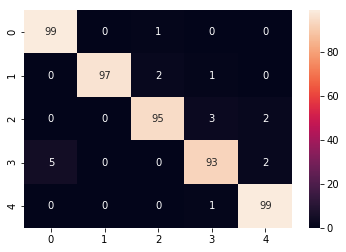

In [52]:
#Confusion Matrix
confusionmatrix=[]

temp=[0,0,0,0,0]
for i in range(len(class_wise)):
    confusionmatrix.append(temp)
    temp=copy.deepcopy(temp)
for i in range(len(test_label)):
    confusionmatrix[test_label[i]][label_pred[i]]=confusionmatrix[test_label[i]][label_pred[i]]+1
seaborn.heatmap(confusionmatrix,annot=True,fmt="d")   

# KNN

In [53]:
# For testing the test set
test_label=[]
for i in range(len(test_data)):
    for j in range(len(test_data[i])):
        test_label.append(i)
        

In [60]:
k=5
n=5

In [61]:
a=[5,0,9,1,2,3]
a[-k:]

[0, 9, 1, 2, 3]

In [62]:
label_pred=[]
prob_dist=[[] for i in range(n)]
counter=0
for i in range(len(test_data_knn)):
    if counter%5==0:
        print("Counter : ",counter)
    counter+=1
    temp=[]
    for j in range(len(train_data_knn)):
        temp.append(cosine_sim(test_data_knn[i],train_data_knn[j]))
    label=sort_list(train_label_knn,temp)
    label1=label[-k:]
#     print(label1)
    pred,predict_proba=prediction_knn(label1,n)
#     print("Prediction: ",pred)
    label_pred.append(pred)
    for i in range(n):
        
        prob_dist[i].append(predict_proba[i])
    

Counter :  0
Counter :  5
Counter :  10
Counter :  15
Counter :  20
Counter :  25
Counter :  30
Counter :  35
Counter :  40
Counter :  45
Counter :  50
Counter :  55
Counter :  60
Counter :  65
Counter :  70
Counter :  75
Counter :  80
Counter :  85
Counter :  90
Counter :  95
Counter :  100
Counter :  105
Counter :  110
Counter :  115
Counter :  120
Counter :  125
Counter :  130
Counter :  135
Counter :  140
Counter :  145
Counter :  150
Counter :  155
Counter :  160
Counter :  165
Counter :  170
Counter :  175
Counter :  180
Counter :  185
Counter :  190
Counter :  195
Counter :  200
Counter :  205
Counter :  210
Counter :  215
Counter :  220
Counter :  225
Counter :  230
Counter :  235
Counter :  240
Counter :  245
Counter :  250
Counter :  255
Counter :  260
Counter :  265
Counter :  270
Counter :  275
Counter :  280
Counter :  285
Counter :  290
Counter :  295
Counter :  300
Counter :  305
Counter :  310
Counter :  315
Counter :  320
Counter :  325
Counter :  330
Counter :  335
Co

In [63]:
print("Test Accuracy : ",accuracy(label_pred,test_label))

Test Accuracy :  0.862


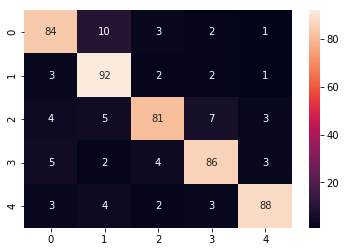

In [64]:
#Confusion Matrix
confusionmatrix=[]

temp=[0,0,0,0,0]
for i in range(len(class_wise)):
    confusionmatrix.append(temp)
    temp=copy.deepcopy(temp)
for i in range(len(test_label_knn)):
    confusionmatrix[test_label_knn[i]][label_pred[i]]=confusionmatrix[test_label_knn[i]][label_pred[i]]+1
seaborn.heatmap(confusionmatrix,annot=True,fmt="d")   

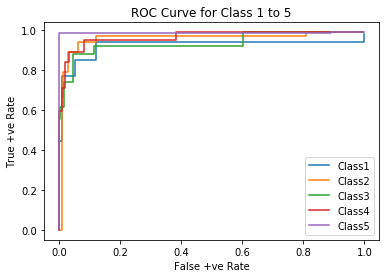

In [65]:
#ROC
# ROC Curve 
# prob_dist=np.transpose(prob_dist)
for i in range(5):
    tpr,fpr=roc_design(prob_dist[i],test_label_knn,i)
    plt.plot(fpr, tpr ,label="Class"+str(i+1))
# roccurve(prob_dist,test_label)
plt.xlabel("False +ve Rate")
plt.ylabel("True +ve Rate")
plt.legend()
plt.title("ROC Curve for Class 1 to 5")
plt.show()